# Analysis of cars.com
### By Sergio Cornejo

## Table of Contents
1. [Introduction](#Introduction)
2. [Imports and Data Cleaning](#Imports-and-Data-Cleaning)
3. [Third Example](#third-example)
4. [Fourth Example](#fourth-examplehttpwwwfourthexamplecom)

## Introduction

The dataset has 9330 different vehicles and the objective is to choose the most optimal vehicle based on statistics. The statistical method used in this analysis is multiple linear regression. The budget for the vehicle is also $20,000.

## Imports and Data Cleaning

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('new-used-cars-dataset.csv')
df

,Car Names,Mileages,Ratings,Reviews,used/certified,price drop,Price
0,2019 Honda Accord Sport,Mileage,3.7,(3 reviews),Used,$501 price drop,"$27,995"
1,2015 Chevrolet Corvette Stingray Z51,"29,192 mi.",3.7,(3 reviews),Used,$277 price drop,"$52,000"
2,2020 Jeep Grand Cherokee Overland,"53,561 mi.",4.8,"(1,147 reviews)",Used,"$2,000 price drop","$41,998"
3,2019 Audi A7 3.0T Prestige,"46,664 mi.",4.9,"(1,831 reviews)",Used,"$2,090 price drop","$62,750"
4,2017 Ford Mustang GT Premium,"21,726 mi.",4.0,(409 reviews),Used,$200 price drop,"$29,995"
...,...,...,...,...,...,...,...
9325,2019 Lexus IS 300 Base,"61,106 mi.",4.7,"(4,658 reviews)",Used,"$2,770 price drop","$36,500"
9326,2019 Kia Sorento L,"11,132 mi.",4.8,(505 reviews),Used,$200 price drop,"$23,450"
9327,2017 GMC Acadia Denali,"55,074 mi.",3.4,(127 reviews),Used,"$2,065 price drop","$29,381"
9328,2019 Honda Pilot Elite,"57,150 mi.",4.9,"(8,222 reviews)",Honda Certified,"$2,007 price drop","$38,488"


In [3]:
df = df.drop(df[df.Mileages == "Mileage"].index)
df

,Car Names,Mileages,Ratings,Reviews,used/certified,price drop,Price
1,2015 Chevrolet Corvette Stingray Z51,"29,192 mi.",3.7,(3 reviews),Used,$277 price drop,"$52,000"
2,2020 Jeep Grand Cherokee Overland,"53,561 mi.",4.8,"(1,147 reviews)",Used,"$2,000 price drop","$41,998"
3,2019 Audi A7 3.0T Prestige,"46,664 mi.",4.9,"(1,831 reviews)",Used,"$2,090 price drop","$62,750"
4,2017 Ford Mustang GT Premium,"21,726 mi.",4.0,(409 reviews),Used,$200 price drop,"$29,995"
5,2016 Jeep Grand Cherokee Limited,"66,514 mi.",4.6,"(1,348 reviews)",Used,"$2,000 price drop","$26,499"
...,...,...,...,...,...,...,...
9325,2019 Lexus IS 300 Base,"61,106 mi.",4.7,"(4,658 reviews)",Used,"$2,770 price drop","$36,500"
9326,2019 Kia Sorento L,"11,132 mi.",4.8,(505 reviews),Used,$200 price drop,"$23,450"
9327,2017 GMC Acadia Denali,"55,074 mi.",3.4,(127 reviews),Used,"$2,065 price drop","$29,381"
9328,2019 Honda Pilot Elite,"57,150 mi.",4.9,"(8,222 reviews)",Honda Certified,"$2,007 price drop","$38,488"


In [4]:
df[['Year','Name']] = df['Car Names'].str.split(n=1,expand=True)
df = df.drop('Car Names',axis=1)
df.Year = df.Year.astype(int)
df

,Mileages,Ratings,Reviews,used/certified,price drop,Price,Year,Name
1,"29,192 mi.",3.7,(3 reviews),Used,$277 price drop,"$52,000",2015,Chevrolet Corvette Stingray Z51
2,"53,561 mi.",4.8,"(1,147 reviews)",Used,"$2,000 price drop","$41,998",2020,Jeep Grand Cherokee Overland
3,"46,664 mi.",4.9,"(1,831 reviews)",Used,"$2,090 price drop","$62,750",2019,Audi A7 3.0T Prestige
4,"21,726 mi.",4.0,(409 reviews),Used,$200 price drop,"$29,995",2017,Ford Mustang GT Premium
5,"66,514 mi.",4.6,"(1,348 reviews)",Used,"$2,000 price drop","$26,499",2016,Jeep Grand Cherokee Limited
...,...,...,...,...,...,...,...,...
9325,"61,106 mi.",4.7,"(4,658 reviews)",Used,"$2,770 price drop","$36,500",2019,Lexus IS 300 Base
9326,"11,132 mi.",4.8,(505 reviews),Used,$200 price drop,"$23,450",2019,Kia Sorento L
9327,"55,074 mi.",3.4,(127 reviews),Used,"$2,065 price drop","$29,381",2017,GMC Acadia Denali
9328,"57,150 mi.",4.9,"(8,222 reviews)",Honda Certified,"$2,007 price drop","$38,488",2019,Honda Pilot Elite


In [5]:
df[['Mileages','del']] = df['Mileages'].str.split(n=1,expand=True)
df[['Mileages1','Mileages2']] = df['Mileages'].str.split(",",n=1,expand=True)
df['Mileages'] = df['Mileages1'] + df['Mileages2']
df['Mileages'] = df['Mileages'].fillna(df.Mileages1)
df = df.drop(['Mileages1','Mileages2','del'],axis=1)
df.Mileages = df.Mileages.astype(int)
df

,Mileages,Ratings,Reviews,used/certified,price drop,Price,Year,Name
1,29192,3.7,(3 reviews),Used,$277 price drop,"$52,000",2015,Chevrolet Corvette Stingray Z51
2,53561,4.8,"(1,147 reviews)",Used,"$2,000 price drop","$41,998",2020,Jeep Grand Cherokee Overland
3,46664,4.9,"(1,831 reviews)",Used,"$2,090 price drop","$62,750",2019,Audi A7 3.0T Prestige
4,21726,4.0,(409 reviews),Used,$200 price drop,"$29,995",2017,Ford Mustang GT Premium
5,66514,4.6,"(1,348 reviews)",Used,"$2,000 price drop","$26,499",2016,Jeep Grand Cherokee Limited
...,...,...,...,...,...,...,...,...
9325,61106,4.7,"(4,658 reviews)",Used,"$2,770 price drop","$36,500",2019,Lexus IS 300 Base
9326,11132,4.8,(505 reviews),Used,$200 price drop,"$23,450",2019,Kia Sorento L
9327,55074,3.4,(127 reviews),Used,"$2,065 price drop","$29,381",2017,GMC Acadia Denali
9328,57150,4.9,"(8,222 reviews)",Honda Certified,"$2,007 price drop","$38,488",2019,Honda Pilot Elite


In [6]:
df[['Reviews','del']] = df['Reviews'].str.split(n=1,expand=True)
df[['del','Reviews']] = df['Reviews'].str.split('(',n=1,expand=True)
df[['rev1','rev2']] = df['Reviews'].str.split(',',n=1,expand=True)
df['Reviews'] = df['rev1'] + df['rev2']
df['Reviews'] = df['Reviews'].fillna(df.rev1)

df = df.drop(['del','rev1','rev2'],axis=1)
df.Reviews = df.Reviews.astype(int)
df

,Mileages,Ratings,Reviews,used/certified,price drop,Price,Year,Name
1,29192,3.7,3,Used,$277 price drop,"$52,000",2015,Chevrolet Corvette Stingray Z51
2,53561,4.8,1147,Used,"$2,000 price drop","$41,998",2020,Jeep Grand Cherokee Overland
3,46664,4.9,1831,Used,"$2,090 price drop","$62,750",2019,Audi A7 3.0T Prestige
4,21726,4.0,409,Used,$200 price drop,"$29,995",2017,Ford Mustang GT Premium
5,66514,4.6,1348,Used,"$2,000 price drop","$26,499",2016,Jeep Grand Cherokee Limited
...,...,...,...,...,...,...,...,...
9325,61106,4.7,4658,Used,"$2,770 price drop","$36,500",2019,Lexus IS 300 Base
9326,11132,4.8,505,Used,$200 price drop,"$23,450",2019,Kia Sorento L
9327,55074,3.4,127,Used,"$2,065 price drop","$29,381",2017,GMC Acadia Denali
9328,57150,4.9,8222,Honda Certified,"$2,007 price drop","$38,488",2019,Honda Pilot Elite


In [7]:
df[['Make','Model']] = df['Name'].str.split(n=1,expand=True)
df

,Mileages,Ratings,Reviews,used/certified,price drop,Price,Year,Name,Make,Model
1,29192,3.7,3,Used,$277 price drop,"$52,000",2015,Chevrolet Corvette Stingray Z51,Chevrolet,Corvette Stingray Z51
2,53561,4.8,1147,Used,"$2,000 price drop","$41,998",2020,Jeep Grand Cherokee Overland,Jeep,Grand Cherokee Overland
3,46664,4.9,1831,Used,"$2,090 price drop","$62,750",2019,Audi A7 3.0T Prestige,Audi,A7 3.0T Prestige
4,21726,4.0,409,Used,$200 price drop,"$29,995",2017,Ford Mustang GT Premium,Ford,Mustang GT Premium
5,66514,4.6,1348,Used,"$2,000 price drop","$26,499",2016,Jeep Grand Cherokee Limited,Jeep,Grand Cherokee Limited
...,...,...,...,...,...,...,...,...,...,...
9325,61106,4.7,4658,Used,"$2,770 price drop","$36,500",2019,Lexus IS 300 Base,Lexus,IS 300 Base
9326,11132,4.8,505,Used,$200 price drop,"$23,450",2019,Kia Sorento L,Kia,Sorento L
9327,55074,3.4,127,Used,"$2,065 price drop","$29,381",2017,GMC Acadia Denali,GMC,Acadia Denali
9328,57150,4.9,8222,Honda Certified,"$2,007 price drop","$38,488",2019,Honda Pilot Elite,Honda,Pilot Elite


In [8]:
df[['price drop','del']] = df['price drop'].str.split(n=1,expand=True)
df[['del2','price drop']] = df['price drop'].str.split('$',n=1,expand=True)
df[['col1','col2']] = df['price drop'].str.split(',',n=1,expand=True)
df['price drop'] = df.col1 + df.col2
df['price drop'] = df['price drop'].fillna(df.col1)

df = df.drop(['del','del2','col1','col2'],axis=1)
df['price drop'] = df['price drop'].astype(int)
df['price drop'] = df['price drop'] * -1
df = df.rename(columns={'price drop':'Price_Drop'})
df

,Mileages,Ratings,Reviews,used/certified,Price_Drop,Price,Year,Name,Make,Model
1,29192,3.7,3,Used,-277,"$52,000",2015,Chevrolet Corvette Stingray Z51,Chevrolet,Corvette Stingray Z51
2,53561,4.8,1147,Used,-2000,"$41,998",2020,Jeep Grand Cherokee Overland,Jeep,Grand Cherokee Overland
3,46664,4.9,1831,Used,-2090,"$62,750",2019,Audi A7 3.0T Prestige,Audi,A7 3.0T Prestige
4,21726,4.0,409,Used,-200,"$29,995",2017,Ford Mustang GT Premium,Ford,Mustang GT Premium
5,66514,4.6,1348,Used,-2000,"$26,499",2016,Jeep Grand Cherokee Limited,Jeep,Grand Cherokee Limited
...,...,...,...,...,...,...,...,...,...,...
9325,61106,4.7,4658,Used,-2770,"$36,500",2019,Lexus IS 300 Base,Lexus,IS 300 Base
9326,11132,4.8,505,Used,-200,"$23,450",2019,Kia Sorento L,Kia,Sorento L
9327,55074,3.4,127,Used,-2065,"$29,381",2017,GMC Acadia Denali,GMC,Acadia Denali
9328,57150,4.9,8222,Honda Certified,-2007,"$38,488",2019,Honda Pilot Elite,Honda,Pilot Elite


In [9]:
df[['del','Price']] = df['Price'].str.split('$',n=1,expand=True)
df[['Price1','Price2']] = df['Price'].str.split(',',n=1,expand=True)
df['Price'] = df['Price1'] + df['Price2']
df.Price = df.Price.fillna(df.Price1)
df = df.dropna()
df.Price = df.Price.astype(int)

df = df.drop(['del','Price1','Price2'],axis=1)
df

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Mileages,Ratings,Reviews,used/certified,Price_Drop,Price,Year,Name,Make,Model
1,29192,3.7,3,Used,-277,52000,2015,Chevrolet Corvette Stingray Z51,Chevrolet,Corvette Stingray Z51
2,53561,4.8,1147,Used,-2000,41998,2020,Jeep Grand Cherokee Overland,Jeep,Grand Cherokee Overland
3,46664,4.9,1831,Used,-2090,62750,2019,Audi A7 3.0T Prestige,Audi,A7 3.0T Prestige
4,21726,4.0,409,Used,-200,29995,2017,Ford Mustang GT Premium,Ford,Mustang GT Premium
5,66514,4.6,1348,Used,-2000,26499,2016,Jeep Grand Cherokee Limited,Jeep,Grand Cherokee Limited
...,...,...,...,...,...,...,...,...,...,...
9325,61106,4.7,4658,Used,-2770,36500,2019,Lexus IS 300 Base,Lexus,IS 300 Base
9326,11132,4.8,505,Used,-200,23450,2019,Kia Sorento L,Kia,Sorento L
9327,55074,3.4,127,Used,-2065,29381,2017,GMC Acadia Denali,GMC,Acadia Denali
9328,57150,4.9,8222,Honda Certified,-2007,38488,2019,Honda Pilot Elite,Honda,Pilot Elite


In [10]:
df['used/certified'].unique()

array(['Used', 'Ford Certified', 'Jeep Certified', 'Acura Certified',
       'Toyota Certified', 'Mercedes-Benz Certified', 'RAM Certified',
       'Subaru Certified', 'Cadillac Certified', 'Honda Certified',
       'BMW Certified', 'Porsche Certified', 'Nissan Certified',
       'INFINITI Certified', 'Volkswagen Certified',
       'Alfa Romeo Certified', 'Volvo Certified', 'Kia Certified',
       'GMC Certified', 'Dodge Certified', 'MINI Certified',
       'Chevrolet Certified', 'Buick Certified', 'Maserati Certified',
       'Aston Martin Certified', 'Chrysler Certified'], dtype=object)

In [11]:
df['used/certified'] = df['used/certified'].replace('Used','Replace Used')
df['used/certified'] = df['used/certified'].replace('Aston Martin Certified','Replace Certified')
df['used/certified'] = df['used/certified'].replace('Alfa Romeo Certified','Replace Certified')
df[['col1','used/certified']] = df['used/certified'].str.split(n=1,expand=True)
df['used_or_certified'] = df['used/certified']
df['used_or_certified'] = df['used_or_certified'].replace('Used','0')
df['used_or_certified'] = df['used_or_certified'].replace('Certified','1')
df['used_or_certified'] = df['used_or_certified'].astype(int)
df = df.drop(columns='col1',axis=1)
df

,Mileages,Ratings,Reviews,used/certified,Price_Drop,Price,Year,Name,Make,Model,used_or_certified
1,29192,3.7,3,Used,-277,52000,2015,Chevrolet Corvette Stingray Z51,Chevrolet,Corvette Stingray Z51,0
2,53561,4.8,1147,Used,-2000,41998,2020,Jeep Grand Cherokee Overland,Jeep,Grand Cherokee Overland,0
3,46664,4.9,1831,Used,-2090,62750,2019,Audi A7 3.0T Prestige,Audi,A7 3.0T Prestige,0
4,21726,4.0,409,Used,-200,29995,2017,Ford Mustang GT Premium,Ford,Mustang GT Premium,0
5,66514,4.6,1348,Used,-2000,26499,2016,Jeep Grand Cherokee Limited,Jeep,Grand Cherokee Limited,0
...,...,...,...,...,...,...,...,...,...,...,...
9325,61106,4.7,4658,Used,-2770,36500,2019,Lexus IS 300 Base,Lexus,IS 300 Base,0
9326,11132,4.8,505,Used,-200,23450,2019,Kia Sorento L,Kia,Sorento L,0
9327,55074,3.4,127,Used,-2065,29381,2017,GMC Acadia Denali,GMC,Acadia Denali,0
9328,57150,4.9,8222,Certified,-2007,38488,2019,Honda Pilot Elite,Honda,Pilot Elite,1


In [12]:
clean_df = df[['Make','Model','Year','used/certified','Price','Price_Drop','Mileages','Ratings','Reviews']]
clean_df

,Make,Model,Year,used/certified,Price,Price_Drop,Mileages,Ratings,Reviews
1,Chevrolet,Corvette Stingray Z51,2015,Used,52000,-277,29192,3.7,3
2,Jeep,Grand Cherokee Overland,2020,Used,41998,-2000,53561,4.8,1147
3,Audi,A7 3.0T Prestige,2019,Used,62750,-2090,46664,4.9,1831
4,Ford,Mustang GT Premium,2017,Used,29995,-200,21726,4.0,409
5,Jeep,Grand Cherokee Limited,2016,Used,26499,-2000,66514,4.6,1348
...,...,...,...,...,...,...,...,...,...
9325,Lexus,IS 300 Base,2019,Used,36500,-2770,61106,4.7,4658
9326,Kia,Sorento L,2019,Used,23450,-200,11132,4.8,505
9327,GMC,Acadia Denali,2017,Used,29381,-2065,55074,3.4,127
9328,Honda,Pilot Elite,2019,Certified,38488,-2007,57150,4.9,8222


In [13]:
avg_group = df.groupby('Make').agg('mean').reset_index()
avg_group

,Make,Mileages,Ratings,Reviews,Price_Drop,Price,Year,used_or_certified
0,Acura,39214.115044,4.451327,1086.486726,-1023.070796,36366.336283,2019.123894,0.230088
1,Alfa,31759.055556,4.400000,1518.166667,-748.888889,34663.222222,2019.055556,0.111111
2,Aston,16152.750000,4.450000,232.000000,-562.000000,173900.000000,2019.500000,0.250000
3,Audi,34055.550000,4.550000,1029.681250,-1213.312500,46045.481250,2018.762500,0.000000
4,BMW,44064.404645,4.528362,1235.310513,-839.119804,40448.113692,2018.569682,0.250611
5,Bentley,30176.600000,3.780000,306.800000,-642.600000,111464.200000,2014.200000,0.000000
6,Buick,33833.648649,4.500000,1311.162162,-744.459459,27733.891892,2019.108108,0.162162
7,Cadillac,63280.230769,4.615385,526.558974,-833.333333,52577.784615,2019.307692,0.697436
8,Chevrolet,41860.947170,4.324906,848.901887,-947.939623,41444.313208,2018.324528,0.056604
9,Chrysler,48635.600000,4.460000,656.900000,-1073.700000,27993.200000,2019.200000,0.100000


In [14]:
median_group = df.groupby('Make').agg('median').reset_index()
median_group

,Make,Mileages,Ratings,Reviews,Price_Drop,Price,Year,used_or_certified
0,Acura,28386.0,4.60,566.0,-720.0,37991.0,2020.0,0.0
1,Alfa,24626.5,4.45,934.5,-478.0,33787.5,2019.0,0.0
2,Aston,16247.5,4.60,110.0,-485.5,172350.0,2020.0,0.0
3,Audi,30135.5,4.60,579.0,-900.0,42995.0,2019.0,0.0
4,BMW,30314.5,4.60,854.0,-500.0,35900.0,2019.0,0.0
5,Bentley,30000.0,4.10,239.0,-677.0,86895.0,2012.0,0.0
6,Buick,28656.0,4.70,586.0,-600.0,25299.0,2019.0,0.0
7,Cadillac,87922.0,4.70,311.0,-500.0,64551.0,2020.0,1.0
8,Chevrolet,48314.0,4.20,421.0,-612.0,44898.0,2018.0,0.0
9,Chrysler,40141.0,4.65,196.5,-760.5,27623.5,2020.0,0.0


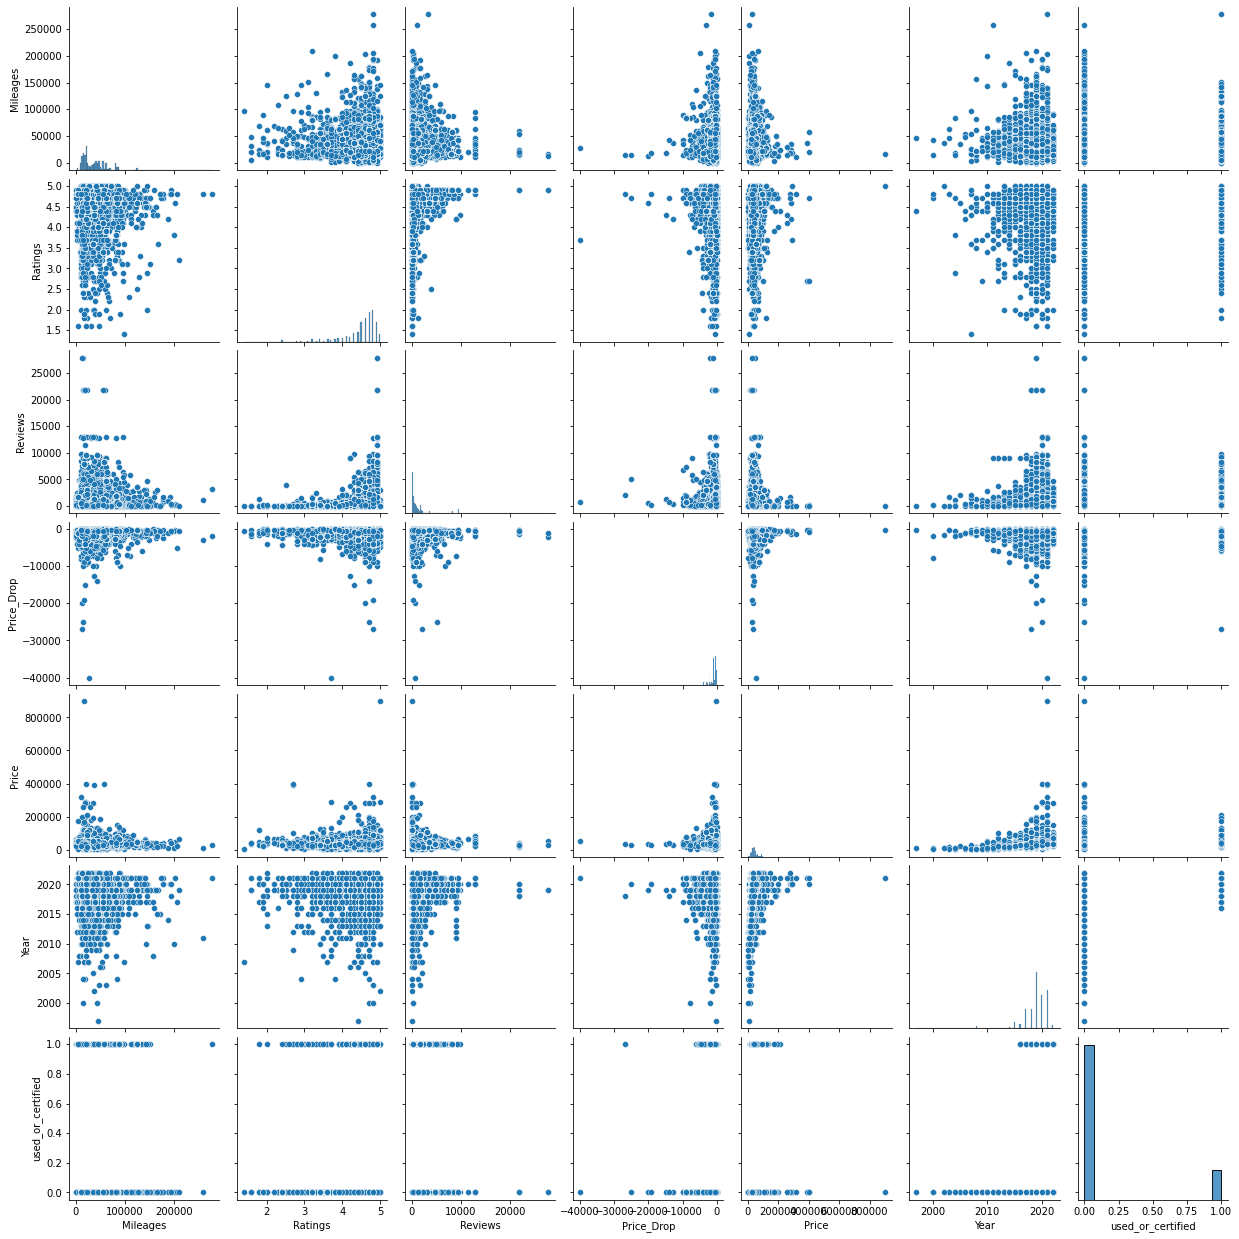

In [15]:
sns.pairplot(df)
plt.show()

In [16]:
df.corr()

,Mileages,Ratings,Reviews,Price_Drop,Price,Year,used_or_certified
Mileages,1.000000,-0.065896,0.026883,-0.052406,0.027833,-0.005490,0.040703
Ratings,-0.065896,1.000000,0.290190,0.020676,0.013630,0.081252,0.130632
Reviews,0.026883,0.290190,1.000000,-0.009909,-0.049404,0.111492,0.181413
Price_Drop,-0.052406,0.020676,-0.009909,1.000000,-0.168373,-0.093694,0.065003
Price,0.027833,0.013630,-0.049404,-0.168373,1.000000,0.390525,0.111812
Year,-0.005490,0.081252,0.111492,-0.093694,0.390525,1.000000,0.202556
used_or_certified,0.040703,0.130632,0.181413,0.065003,0.111812,0.202556,1.000000


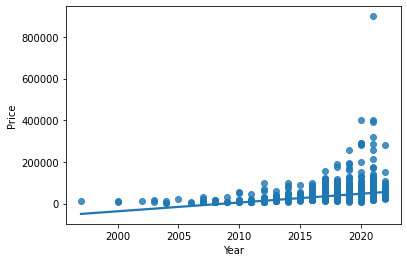

In [17]:
sns.regplot(x='Year',y='Price',data=df,ci=False)
plt.show()

In [18]:
range = df[(df.Price <= 20000)]
range

,Mileages,Ratings,Reviews,used/certified,Price_Drop,Price,Year,Name,Make,Model,used_or_certified
7,45046,4.3,73,Certified,-2250,14756,2016,Ford Fusion SE,Ford,Fusion SE,1
16,66000,4.7,659,Used,-670,16990,2013,Lexus GS 350 Base,Lexus,GS 350 Base,0
17,48605,3.3,239,Used,-499,15165,2021,Mitsubishi Mirage ES,Mitsubishi,Mirage ES,0
22,19847,4.6,33,Used,-1896,8999,2011,Toyota Avalon Limited,Toyota,Avalon Limited,0
28,6105,3.7,3,Used,-887,15990,2014,Nissan Leaf SL,Nissan,Leaf SL,0
...,...,...,...,...,...,...,...,...,...,...,...
9263,37656,4.3,1249,Used,-778,19997,2018,Ford Escape SE,Ford,Escape SE,0
9274,22926,4.7,2189,Used,-500,17955,2017,Volkswagen Jetta 1.4T SE,Volkswagen,Jetta 1.4T SE,0
9300,22048,4.7,30,Used,-500,4995,2008,Ford Escape XLT,Ford,Escape XLT,0
9313,37656,4.3,1249,Used,-778,19997,2018,Ford Escape SE,Ford,Escape SE,0


In [19]:
range.Make.value_counts()

Ford             231
Volkswagen       103
Chevrolet         26
Toyota            22
Honda             16
BMW               14
Kia               12
Hyundai           12
Lexus             11
Nissan            10
Subaru             8
Mercedes-Benz      8
Audi               8
Mitsubishi         7
Acura              7
Mazda              6
Dodge              5
INFINITI           4
Lincoln            4
Jeep               4
GMC                3
MINI               2
Volvo              2
Cadillac           2
Scion              1
Buick              1
Chrysler           1
Name: Make, dtype: int64

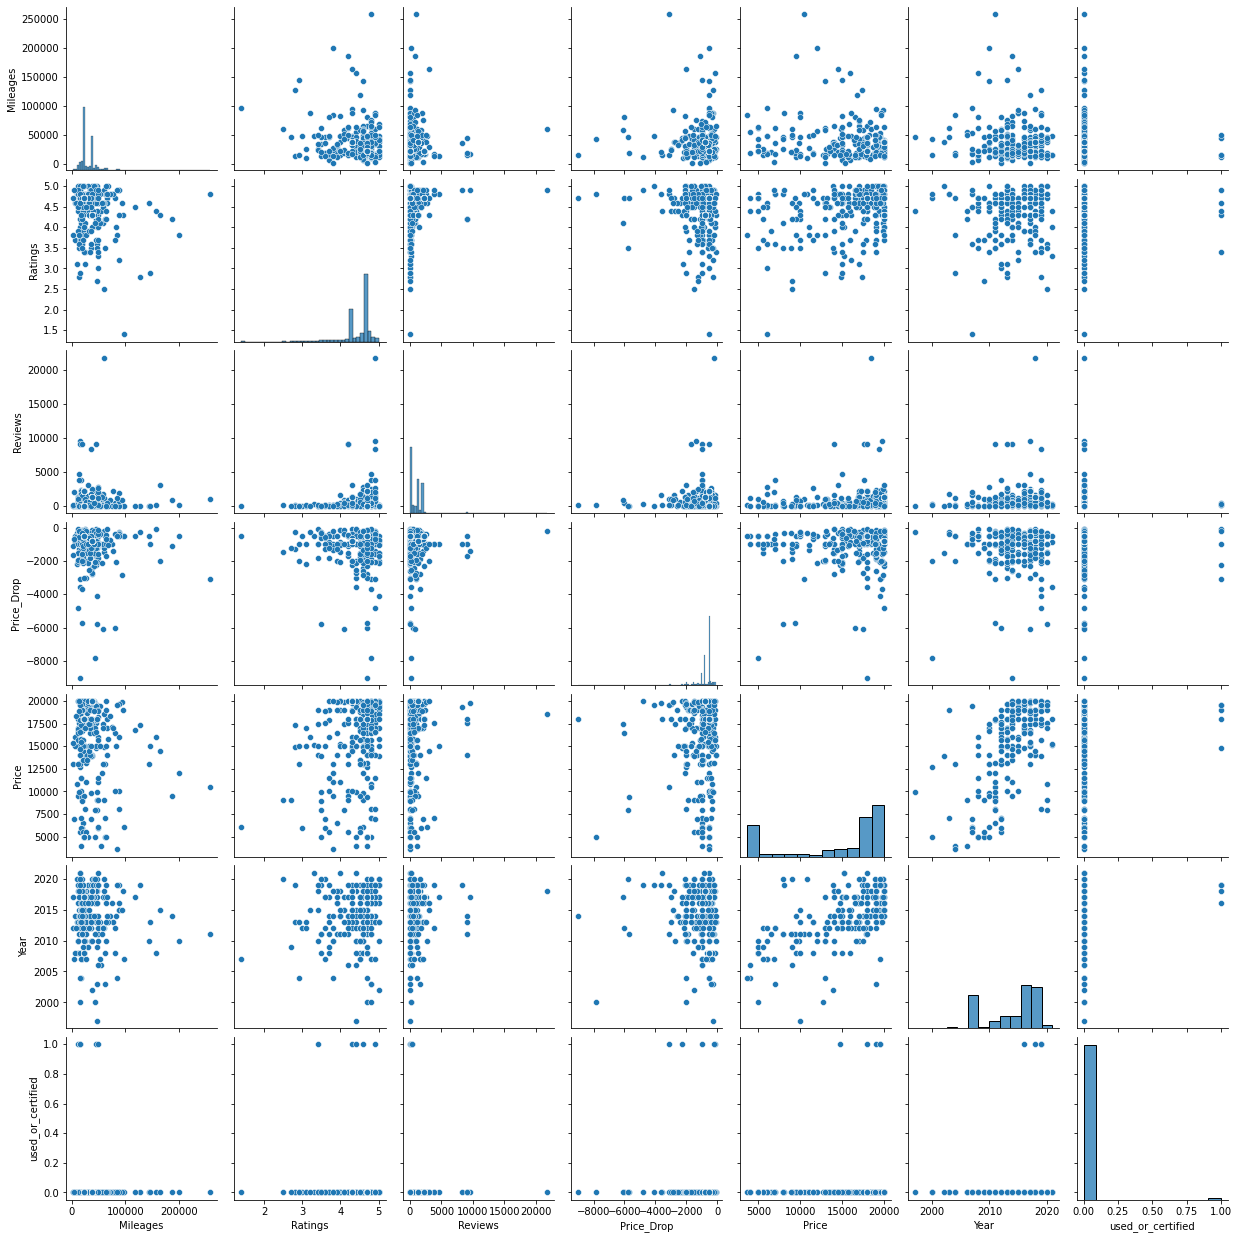

In [20]:
sns.pairplot(range)
plt.show()

In [21]:
range.corr()

,Mileages,Ratings,Reviews,Price_Drop,Price,Year,used_or_certified
Mileages,1.000000,-0.248205,-0.014266,-0.110133,0.086923,0.049781,-0.021362
Ratings,-0.248205,1.000000,0.163649,0.038279,-0.070083,-0.087587,-0.040896
Reviews,-0.014266,0.163649,1.000000,0.078103,0.365838,0.344210,-0.053718
Price_Drop,-0.110133,0.038279,0.078103,1.000000,-0.089656,-0.042741,-0.054219
Price,0.086923,-0.070083,0.365838,-0.089656,1.000000,0.850489,0.056268
Year,0.049781,-0.087587,0.344210,-0.042741,0.850489,1.000000,0.088157
used_or_certified,-0.021362,-0.040896,-0.053718,-0.054219,0.056268,0.088157,1.000000


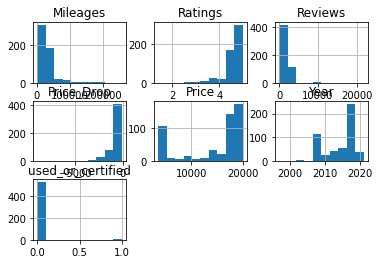

In [22]:
range.hist()
plt.show()

In [23]:
results = smf.ols('Price ~ Mileages+Ratings+Reviews+Year+used_or_certified+Price_Drop',data=range).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     241.8
Date:                Fri, 09 Sep 2022   Prob (F-statistic):          2.79e-147
Time:                        13:55:55   Log-Likelihood:                -4992.5
No. Observations:                 530   AIC:                             9999.
Df Residuals:                     523   BIC:                         1.003e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.153e+06   6.52e+04    -33.040      0.000   -2.28e+06   -2.03e+06
Mileages              0.0100      0.006      1.732      0.084      -0.001       0.021
Ratings             -21.6171    341.522     -0.063      0.950    -692.540     649.305
Reviews               0.3493      0.096      3.624      0.000       0.160       0.539
Year               1076.0291     32.266     33.349      0.000    1012.643    1139.415
used_or_certified  -792.3772   1362.796     -0.581      0.561   -3469.603    1884.849
Price_Drop           -0.3909      0.154     -2.543      0.011      -0.693      -0.089
==============================================================================
Omnibus:                       93.676   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              706.806
Skew:                           0.524   Prob(JB):                    3.30e-154
Kurtosis:                       8.560   Cond. No.                     2.01e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
results = smf.ols('Price ~ Mileages+Reviews+Year',data=range).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     478.0
Date:                Fri, 09 Sep 2022   Prob (F-statistic):          9.00e-150
Time:                        13:55:56   Log-Likelihood:                -4995.9
No. Observations:                 530   AIC:                         1.000e+04
Df Residuals:                     526   BIC:                         1.002e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.161e+06   6.39e+04    -33.788      0.000   -2.29e+06   -2.04e+06
Mileages       0.0117      0.006      2.093      0.037       0.001       0.023
Reviews        0.3301      0.094      3.515      0.000       0.146       0.515
Year        1079.7222     31.770     33.985      0.000    1017.310    1142.135
==============================================================================
Omnibus:                       97.325   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              593.748
Skew:                           0.634   Prob(JB):                    1.17e-129
Kurtosis:                       8.028   Cond. No.                     1.97e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
certified = range[range['used_or_certified'] == 1].reset_index(drop=True)
certified

,Mileages,Ratings,Reviews,used/certified,Price_Drop,Price,Year,Name,Make,Model,used_or_certified
0,45046,4.3,73,Certified,-2250,14756,2016,Ford Fusion SE,Ford,Fusion SE,1
1,11499,4.4,403,Certified,-107,17995,2018,Toyota Mirai Base,Toyota,Mirai Base,1
2,15737,4.9,71,Certified,-3095,19495,2019,Chevrolet Trax LS,Chevrolet,Trax LS,1
3,49577,3.4,179,Certified,-1000,18995,2019,Chevrolet Trax LT,Chevrolet,Trax LT,1
4,15743,4.6,345,Certified,-232,19505,2019,Chevrolet Trax LT,Chevrolet,Trax LT,1


In [26]:
averages = certified.mean().reset_index()
averages = averages.rename(columns={'index':'Variable',0:'Averages'})
averages

/var/folders/bs/myp57mcd13gc8lrf18b68l0m0000gn/T/ipykernel_38620/3651589907.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  averages = certified.mean().reset_index()


,Variable,Averages
0,Mileages,27520.40
1,Ratings,4.32
2,Reviews,214.20
3,Price_Drop,-1336.80
4,Price,18149.20
5,Year,2018.20
6,used_or_certified,1.00


In [27]:
pd.merge(averages, certified, left_index=True,right_index=True)

,Variable,Averages,Mileages,Ratings,Reviews,used/certified,Price_Drop,Price,Year,Name,Make,Model,used_or_certified
0,Mileages,27520.40,45046,4.3,73,Certified,-2250,14756,2016,Ford Fusion SE,Ford,Fusion SE,1
1,Ratings,4.32,11499,4.4,403,Certified,-107,17995,2018,Toyota Mirai Base,Toyota,Mirai Base,1
2,Reviews,214.20,15737,4.9,71,Certified,-3095,19495,2019,Chevrolet Trax LS,Chevrolet,Trax LS,1
3,Price_Drop,-1336.80,49577,3.4,179,Certified,-1000,18995,2019,Chevrolet Trax LT,Chevrolet,Trax LT,1
4,Price,18149.20,15743,4.6,345,Certified,-232,19505,2019,Chevrolet Trax LT,Chevrolet,Trax LT,1
